**STUDENT PERFROMANCE PREDICTOR**

1) Problem statement-
The project is to understand how the students test scores are dependent on other independent/variables as per the survey collected

#### 2. Data Source

* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### 2.1 Importing csv using pandas Dataframe

In [2]:


df=pd.read_csv('students.csv')

In [3]:
# Top 5 records

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info

<bound method DataFrame.info of      gender race_ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
0                      none    

In [5]:
df.shape

(1000, 8)

2.2 1000 rows & 8 columns

2.3 

Dataset information gathered :(rows)
* gender : sex of students > (Male/Femalle)
* ethnicity : ethnicity of students > (Group A, B,C, D,E)
* parental level of education : parents' final education >(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test 
* Test preparation course : complete or not complete before test
* math score
* reading score
* writing score

**3. Steps followed to check for dataset**

Check Missing values

Check Duplicates in data

Check data type

Check the number of unique values of each column

Check statistics of data distribution

Check the type of data categories 

3.1 Checking for missing data 

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Threre are no missing values in this dataset

**3.2 Check for DUPLICATES**

In [7]:
df.duplicated().sum()

0

#### There are no duplicates in this Dataset

**3.3 Check data types**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**3.4 Checking the number of unique values of each column**

In [9]:
# no. of unique data in the columns

df.nunique() 

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

**3.5 Check stats of data set**

In [10]:
# to get a rough idea about distributions 

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**3.6 Insights from stats of the data**

1) The is a likley to be a normal distributed looking at the min and max
2) Mean is in and around  between 66-69
3) Math min score is 0 & max is 100 which might indicate us about the outliers
4) Scores of Math are comparibly lesser as the mean indicates

**3.7 Exploring Data**

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
# numerical & categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


In [13]:
print('The Dataset has {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nThe Dataset has {} categorical features : {}'.format(len(categorical_features), categorical_features))

#format is used to insert values within {}
#len- return number of categories/items in your variable

The Dataset has 3 numerical features : ['math_score', 'reading_score', 'writing_score']

The Dataset has 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
print("Categories in 'gender' variable: ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**There are no output features in this hence we shall be adding the columns of scores & consider avg**

**3.8 Adding the columns to get 'Total score' & 'Avg'**

In [16]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

reading_less_35 = df[df['reading_score'] <= 35]['average'].count()
writing_less_35 = df[df['writing_score'] <= 35]['average'].count()
math_less_35 = df[df['math_score'] <= 35]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_35}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_35}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_35}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17
Number of students with less than 20 marks in Maths: 27
Number of students with less than 20 marks in Writing: 18
Number of students with less than 20 marks in Reading: 15


We can see students have performed best in writing & worst in math

**4 DATA VISUALIZATION**

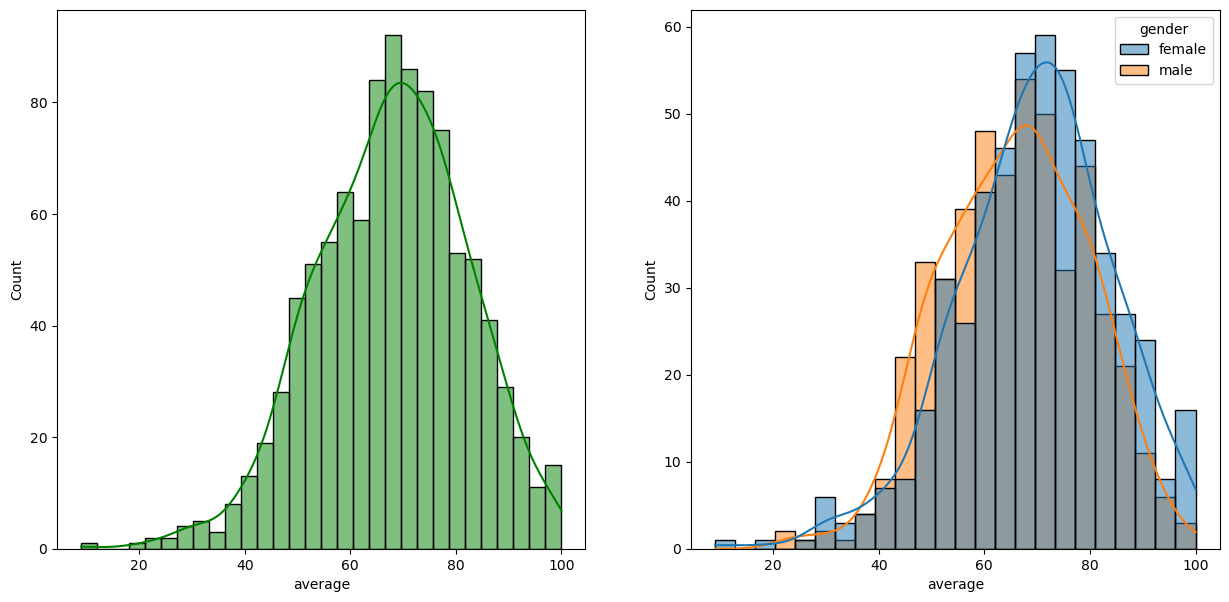

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

**INSIGHTS** 
Female students have performed comparitively better

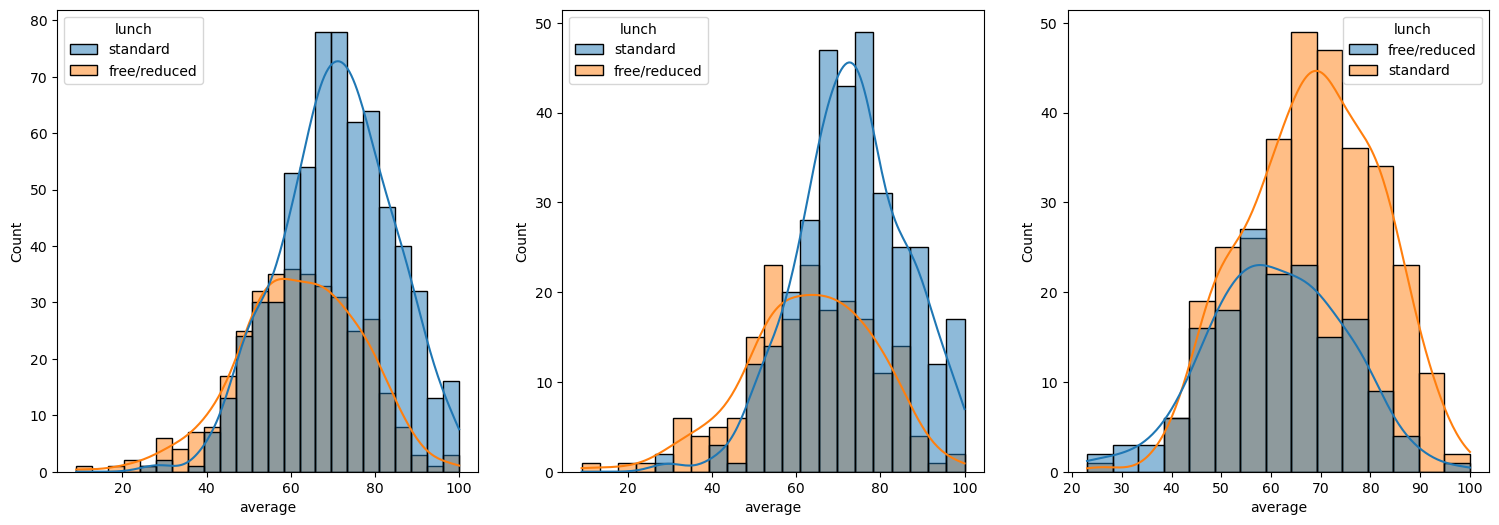

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

standard lunch helps better performance of students

**4.3 Multivariate analysis using pieplot**

In [20]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<AxesSubplot:xlabel='average', ylabel='lunch'>

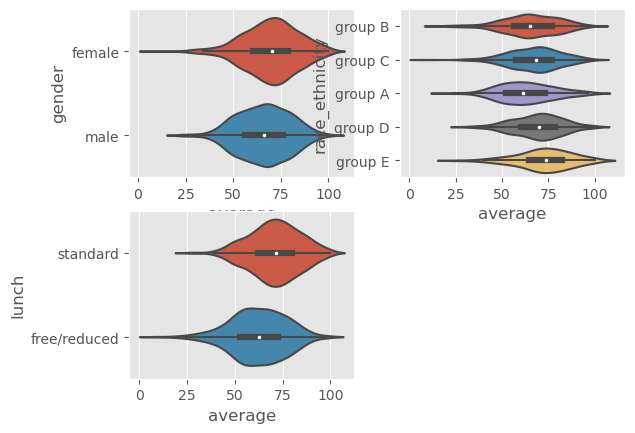

In [21]:
# Representing data using violin form
plt.style.use('ggplot')
plt.subplot(2,2,1)
sns.violinplot(x = 'average', y = 'gender', data = df)
plt.subplot(2,2,2)
sns.violinplot(x = 'average', y = 'race_ethnicity', data = df)
plt.subplot(2,2,3)
sns.violinplot(x = 'average', y = 'lunch', data = df)

**INSIGHTS**
1) Girls follow a normal distribution while boys have a slight lesser density in min avg scored
2) race ethincity is more or less the same yet still could see group E performing better
3) standard food helps the overall average inc

**4.4 Univariate analysis**

array([[<AxesSubplot:title={'center':'writing_score'}>]], dtype=object)

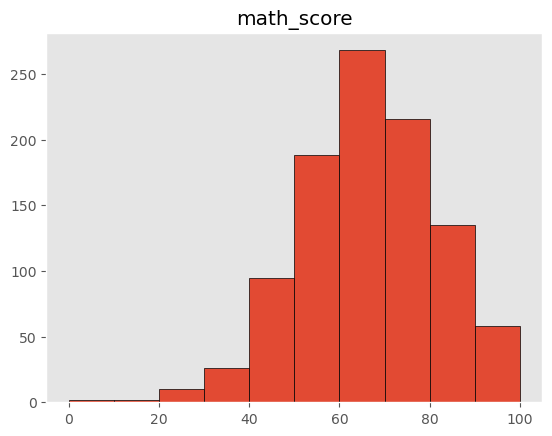

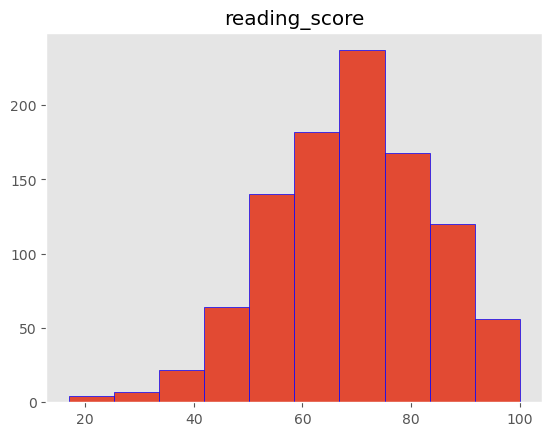

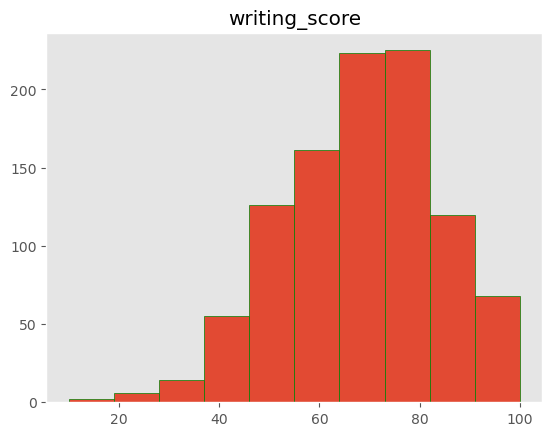

In [22]:
df.hist(column='math_score', grid=False, edgecolor='black')
df.hist(column='reading_score', grid=False, edgecolor='blue')
df.hist(column='writing_score', grid=False, edgecolor='green')

**INSIGHTS** 

Numerical data has almost similar distribution among students

{'whiskers': [<matplotlib.lines.Line2D at 0x25079997e20>,
 'caps': [<matplotlib.lines.Line2D at 0x250796ae040>,
 'boxes': [<matplotlib.lines.Line2D at 0x25079997070>],
 'medians': [<matplotlib.lines.Line2D at 0x250796ae4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x250796aed30>],
 'means': []}

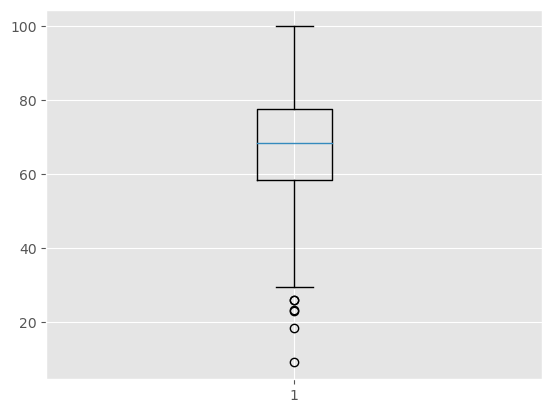

In [24]:
plt.boxplot(df['average'])

- There are very few below 35 and the rest are above , this shows most of the students have performed well

<AxesSubplot:xlabel='parental_level_of_education', ylabel='average'>

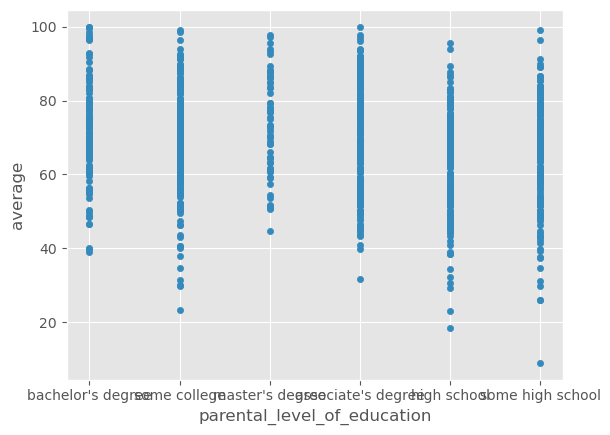

In [26]:
df.plot(x = 'parental_level_of_education', y = 'average', kind = 'scatter')

-  Parental level of education has no affect on the average 